In [1]:
%load_ext autoreload
%autoreload
import poisson_hypergraph
import sem_expo
import xgi
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
from itertools import combinations

Get data

In [2]:
H = xgi.load_xgi_data("senate-bills")

Clean data

In [3]:
party_affs = H.nodes.attrs('affiliation').asdict()
new_nodes = sorted([int(node) - 1 for node in H.nodes])
new_edges = [{int(node) - 1 for node in edge} for edge in H.edges.members()]

# record dem as 0 and rep as 1 for all nodes
labels = []
for party in list(party_affs.values()):
    if party == 'Democrat':
        labels.append(0)
    if party == 'Republican':
        labels.append(1)

# create new dict using our binary labels
label_dict = dict(zip(new_nodes, labels))
sorted_label_dict = dict(sorted(label_dict.items()))

# make new hypergraph
new_H = xgi.Hypergraph(new_edges)
new_H.set_node_attributes(sorted_label_dict, name = "label")

# turn the data set into an object of the GH class (so we can perform SEM on it)
GH = poisson_hypergraph.GH(new_H, [0, 1])

In [4]:
func = sem_expo.sem_functions()
s_intial = np.array([1, 2, 1, 2, 0.5, 0.5, 0.5, 0.5])
estimates = func.SEM(GH, s_intial, 3000, 0.01, 0.001)

In [9]:
def viz(estimates1):
    sns.set_style("whitegrid")
    sns.set_palette("Dark2")
    
    fig, axs = plt.subplots(1, 3, sharex = True, sharey = True)
    fig.set_figwidth(15)
    fig.set_figheight(2.5)
    #plt.setp(axs, ylim=(0, 1))
    plt.subplots_adjust(hspace = 0.4)

    plt.rcParams.update({'font.size': 14})
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 
    
    axs[0].set_title('$\hat{p} = $' f'{estimates1[-1][1]:.2f}' ", " '$\hat{q} = $' f'{estimates1[-1][2]:.2f}')
    axs[0].plot(estimates1[:, 0], estimates1[:, 1], label = "$\hat{p}$")
    axs[0].plot(estimates1[:, 0], estimates1[:, 2], label = "$\hat{q}$")
    axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol = 2)

    axs[1].set_title('$\hat{\gamma}_{e, z_u} = $' f'{estimates1[-1][5]:.2f}' ", " '$\hat{\gamma}_{e, \\bar{z}_u} = $' f'{estimates1[-1][6]:.2f}')
    axs[1].plot(estimates1[:, 0], estimates1[:, 5], label = "$\hat{\gamma}_{e, z_u}$")
    axs[1].plot(estimates1[:, 0], estimates1[:, 6], label = "$\hat{\gamma}_{e, \\bar{z}_u}$")
    axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol = 2)
    
    axs[2].set_title('$\hat{\gamma}_{n, z_u} = $' f'{estimates1[-1][3]:.2f}' ", " '$\hat{\gamma}_{n, \\bar{z}_u} = $' f'{estimates1[-1][4]:.2f}')
    axs[2].plot(estimates1[:, 0], estimates1[:, 3], label = "$\hat{\gamma}_{n, z_u}$")
    axs[2].plot(estimates1[:, 0], estimates1[:, 4], label = "$\hat{\gamma}_{n, \\bar{z}_u}$")
    axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol = 2)

    axs[0].set_xlabel("iterations")
    axs[1].set_xlabel("iterations")
    axs[2].set_xlabel("iterations")

    fig.savefig('senate.png', dpi=300, bbox_inches="tight")


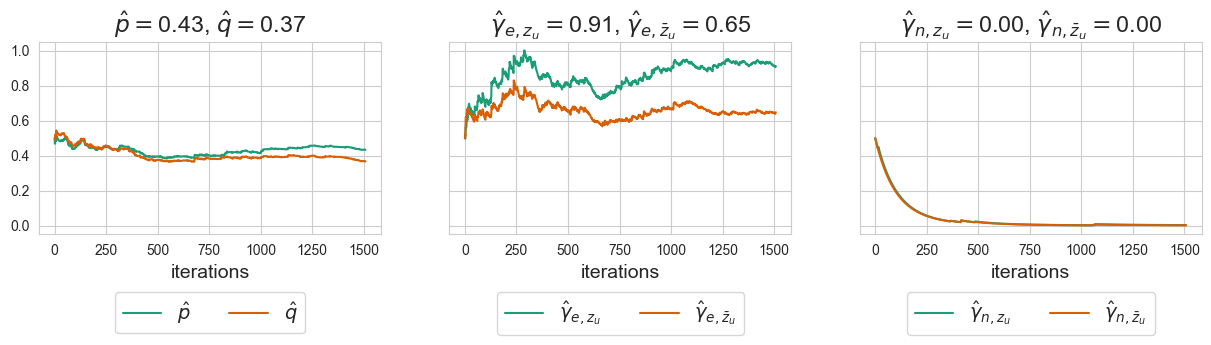

In [10]:
viz(np.array(estimates))

# EDA of senate data

Degree and edge size distributions

In [18]:
H = xgi.load_xgi_data("senate-bills")

In [19]:
party_affs = H.nodes.attrs('affiliation').asdict()
new_nodes = sorted([int(node) - 1 for node in H.nodes])
new_edges = [{int(node) - 1 for node in edge} for edge in H.edges.members()]

# record dem as 0 and rep as 1 for all nodes
labels = []
for party in list(party_affs.values()):
    if party == 'Democrat':
        labels.append(0)
    if party == 'Republican':
        labels.append(1)

# create new dict using our binary labels
label_dict = dict(zip(new_nodes, labels))
sorted_label_dict = dict(sorted(label_dict.items()))

# make new hypergraph
new_H = xgi.Hypergraph(new_edges)
new_H.set_node_attributes(sorted_label_dict, name = "label")

# turn the data set into an object of the GH class (so we can perform SEM on it)
GH = poisson_hypergraph.GH(new_H, [0, 1])

In [25]:
centers, heights = xgi.degree_histogram(new_H)

In [29]:
centers, heights = xgi.degree_histogram(new_H)
list_of_edges_sizes = new_H.edges.size.aslist()
size_counts = dict(Counter(list_of_edges_sizes))

In [34]:
sum(list(size_counts.values()))/len(list(size_counts.values())) #mean edge size

323.96666666666664

In [37]:
sum(new_H.nodes.degree.aslist())/len(new_H.nodes.degree.aslist()) #mean node degree

789.6156462585034

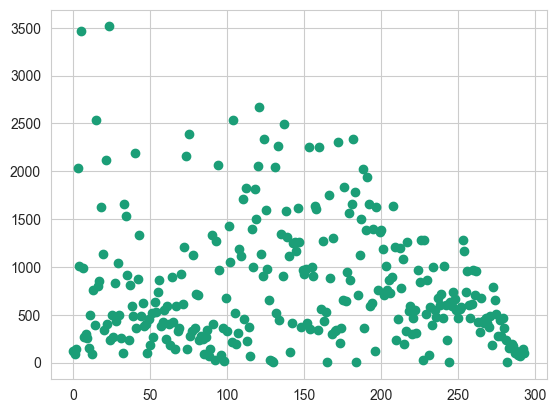

In [11]:
plt.scatter(new_H.nodes, new_H.nodes.degree.aslist())

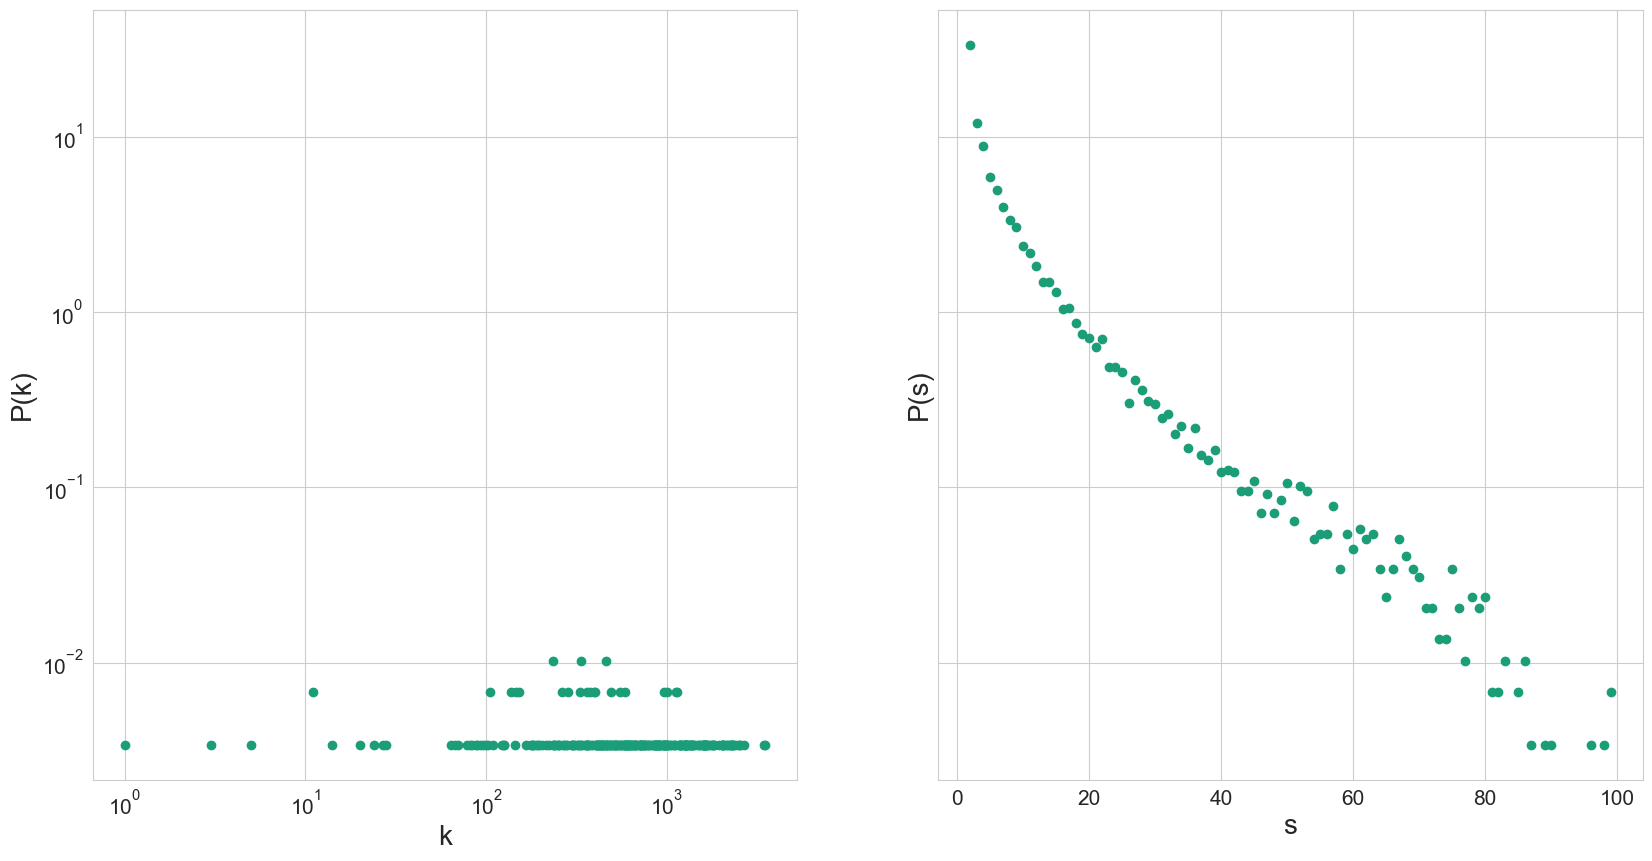

In [32]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")

plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(20)
fig.set_figheight(10)
axs[0].scatter(centers, np.array(heights) / len(H.nodes))
#axs[0].plot(range(1, 10**3), [x ** (-2) for x in range(1, 10**3)], c = "black")
axs[0].set_ylabel("P(k)")
axs[0].set_xlabel("k")
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[1].scatter(list(size_counts.keys()), np.array(list(size_counts.values())) / len(H.nodes))
axs[1].set_ylabel("P(s)")
axs[1].set_xlabel("s")
axs[1].set_yscale('log')


plt.savefig('senate_degree_and_edge_distribution.png', dpi=300, bbox_inches="tight")